In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test  = x_test.reshape(-1, 28*28) / 255.0


In [4]:
def one_hot(y, num_classes=10):
    oh = np.zeros((y.size, num_classes))
    oh[np.arange(y.size), y] = 1
    return oh

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)


In [5]:
np.random.seed(42)

W1 = np.random.randn(784, 128) * 0.01
b1 = np.zeros((1, 128))

W2 = np.random.randn(128, 10) * 0.01
b2 = np.zeros((1, 10))


In [6]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0


In [7]:
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)


In [8]:
def forward(X):
    Z1 = X @ W1 + b1
    A1 = relu(Z1)

    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)

    cache = (X, Z1, A1, Z2, A2)
    return A2, cache


In [9]:
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8), axis=1))


In [10]:
def backward(cache, y_true):
    global W1, b1, W2, b2

    X, Z1, A1, Z2, A2 = cache
    m = X.shape[0]

    dZ2 = A2 - y_true
    dW2 = A1.T @ dZ2 / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = X.T @ dZ1 / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2


In [11]:
lr = 0.1
epochs = 20
batch_size = 128

for epoch in range(epochs):
    for i in range(0, x_train.shape[0], batch_size):
        X_batch = x_train[i:i+batch_size]
        y_batch = y_train_oh[i:i+batch_size]

        y_pred, cache = forward(X_batch)
        loss = cross_entropy(y_batch, y_pred)

        dW1, db1, dW2, db2 = backward(cache, y_batch)

        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")


Epoch 1/20, Loss: 0.3965
Epoch 2/20, Loss: 0.3409
Epoch 3/20, Loss: 0.3052
Epoch 4/20, Loss: 0.2808
Epoch 5/20, Loss: 0.2654
Epoch 6/20, Loss: 0.2513
Epoch 7/20, Loss: 0.2395
Epoch 8/20, Loss: 0.2300
Epoch 9/20, Loss: 0.2223
Epoch 10/20, Loss: 0.2157
Epoch 11/20, Loss: 0.2089
Epoch 12/20, Loss: 0.2032
Epoch 13/20, Loss: 0.1982
Epoch 14/20, Loss: 0.1939
Epoch 15/20, Loss: 0.1898
Epoch 16/20, Loss: 0.1862
Epoch 17/20, Loss: 0.1832
Epoch 18/20, Loss: 0.1797
Epoch 19/20, Loss: 0.1758
Epoch 20/20, Loss: 0.1727


In [12]:
def accuracy(X, y):
    y_pred, _ = forward(X)
    predictions = np.argmax(y_pred, axis=1)
    return np.mean(predictions == y)

print("Train Accuracy:", accuracy(x_train, y_train))
print("Test Accuracy:", accuracy(x_test, y_test))



Train Accuracy: 0.9846166666666667
Test Accuracy: 0.9753


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

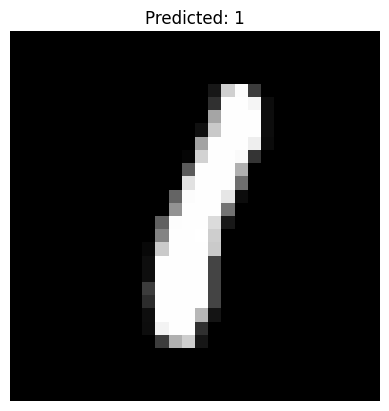

In [13]:
idx = np.random.randint(0, x_test.shape[0])
plt.imshow(x_test[idx].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {np.argmax(forward(x_test[idx:idx+1])[0])}")
plt.axis("off")
